### Importing required Library

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import random

sns.set_context('notebook',font_scale=1.5)

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [2]:
# reading the data files
train = pd.read_csv('Data/train.csv') 
product_data = pd.read_csv('Data/product_data.csv')
store_data = pd.read_csv('Data/store_data.csv')

In [3]:
# checking the size of the dataframes
train.shape, product_data.shape, store_data.shape

((232287, 8), (30, 6), (76, 9))

In [4]:
train.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.39,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,1.98,0,0,35


In [5]:
product_data.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PL ANTSPTC SPG MNT MTHWS,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [6]:
store_data.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
1,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24767
2,613,EAST ALLEN,ALLEN,TX,19100,MAINSTREAM,464.0,64926,29386
3,623,HOUSTON,HOUSTON,TX,26420,MAINSTREAM,NaN,46930,36741
4,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54053


### Merging *train*, *product_data* and *store_data* datasets

In [7]:
train_product_store_data = train.merge(product_data, how = 'left', on='UPC')

train_product_store_data = train_product_store_data.merge(store_data, how = 'left', left_on = 'STORE_NUM', right_on = 'STORE_ID')

In [8]:
train_product_store_data.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,DESCRIPTION,MANUFACTURER,...,PRODUCT_SIZE,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,14-Jan-09,367,1111009477,1.39,1.57,0,0,13,PL MINI TWIST PRETZELS,PRIVATE LABEL,...,15 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
1,14-Jan-09,367,1111009497,1.39,1.39,0,0,20,PL PRETZEL STICKS,PRIVATE LABEL,...,15 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
2,14-Jan-09,367,1111085319,1.88,1.88,0,0,14,PL HONEY NUT TOASTD OATS,PRIVATE LABEL,...,12.25 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
3,14-Jan-09,367,1111085345,1.88,1.88,0,0,29,PL RAISIN BRAN,PRIVATE LABEL,...,20 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
4,14-Jan-09,367,1111085350,1.98,1.98,0,0,35,PL BT SZ FRSTD SHRD WHT,PRIVATE LABEL,...,18 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707


### 1. Does the *Display* have more impact on *demand* than *Feature* or is it the other way round?

<AxesSubplot: xlabel='DISPLAY', ylabel='UNITS'>

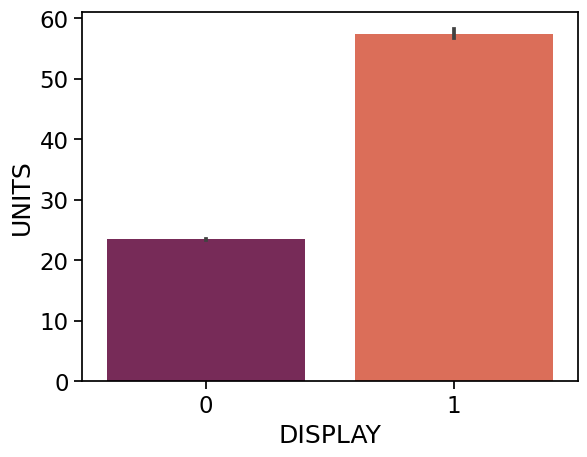

In [9]:
sns.barplot(data = train, x = 'DISPLAY', y = 'UNITS', palette='rocket')

<AxesSubplot: xlabel='FEATURE', ylabel='UNITS'>

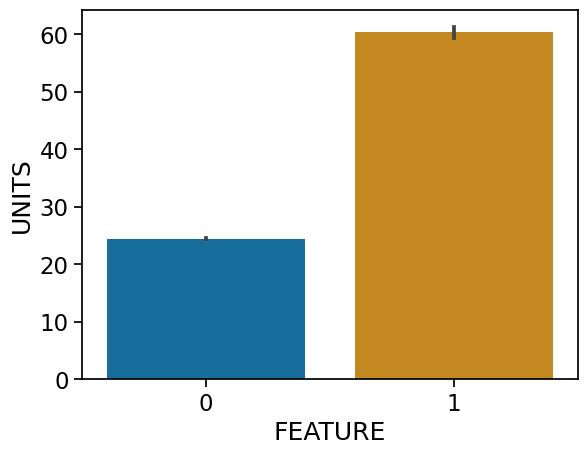

In [10]:
sns.barplot(data=train, x = 'FEATURE', y = 'UNITS', palette='colorblind')

ANS: From the above 2 plots, we can say that both *Display* and *Feature* has equal impact on the demand.

### 2. Does the number of unique manufacturers for a category and sub-category (Bag snacks, Frozen Pizza etc..) impact on the demand?

In [11]:
temp = product_data[['CATEGORY', 'SUB_CATEGORY','MANUFACTURER']].drop_duplicates()
pd.crosstab([temp['CATEGORY'], temp['SUB_CATEGORY']], temp['MANUFACTURER'])

MANUFACTURER                                       FRITO LAY  GENERAL MI  \
CATEGORY              SUB_CATEGORY                                         
BAG SNACKS            PRETZELS                             1           0   
COLD CEREAL           ADULT CEREAL                         0           0   
                      ALL FAMILY CEREAL                    0           1   
                      KIDS CEREAL                          0           0   
FROZEN PIZZA          PIZZA/PREMIUM                        0           0   
ORAL HYGIENE PRODUCTS MOUTHWASH/RINSES AND SPRAYS          0           0   
                      MOUTHWASHES (ANTISEPTIC)             0           0   

MANUFACTURER                                       KELLOGG  P & G  \
CATEGORY              SUB_CATEGORY                                  
BAG SNACKS            PRETZELS                           0      0   
COLD CEREAL           ADULT CEREAL                       0      0   
                      ALL FAMILY CEREAL                  1      0   
                      KIDS CEREAL                        1      0   
FROZEN PIZZA          PIZZA/PREMIUM                      0      0   
ORAL HYGIENE PRODUCTS MOUTHWASH/RINSES AND SPRAYS        0      1   
                      MOUTHWASHES (ANTISEPTIC)           0      1   

MANUFACTURER                                       PRIVATE LABEL  SNYDER S  \
CATEGORY              SUB_CATEGORY                                           
BAG SNACKS            PRETZELS                                 1         1   
COLD CEREAL           ADULT CEREAL                             1         0   
                      ALL FAMILY CEREAL                        1         0   
                      KIDS CEREAL                              0         0   
FROZEN PIZZA          PIZZA/PREMIUM                            1         0   
ORAL HYGIENE PRODUCTS MOUTHWASH/RINSES AND SPRAYS              0         0   
                      MOUTHWASHES (ANTISEPTIC)                 1         0   

MANUFACTURER                                       TOMBSTONE  TONYS  WARNER  
CATEGORY              SUB_CATEGORY                                           
BAG SNACKS            PRETZELS                             0      0       0  
COLD CEREAL           ADULT CEREAL                         0      0       0  
                      ALL FAMILY CEREAL                    0      0       0  
                      KIDS CEREAL                          0      0       0  
FROZEN PIZZA          PIZZA/PREMIUM                        1      1       0  
ORAL HYGIENE PRODUCTS MOUTHWASH/RINSES AND SPRAYS          0      0       0  
                      MOUTHWASHES (ANTISEPTIC)             0      0       1

In [12]:
train_product_store_data.groupby(['CATEGORY', 'SUB_CATEGORY', 'MANUFACTURER'])['UNITS'].mean()

CATEGORY               SUB_CATEGORY                 MANUFACTURER 
BAG SNACKS             PRETZELS                     FRITO LAY        14.971905
                                                    PRIVATE LABEL    44.028180
                                                    SNYDER S         13.240539
COLD CEREAL            ADULT CEREAL                 PRIVATE LABEL    30.995551
                       ALL FAMILY CEREAL            GENERAL MI       46.212829
                                                    KELLOGG          34.186466
                                                    PRIVATE LABEL    30.496661
                       KIDS CEREAL                  KELLOGG          42.096886
FROZEN PIZZA           PIZZA/PREMIUM                PRIVATE LABEL    14.608944
                                                    TOMBSTONE        16.867098
                                                    TONYS            10.632244
ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS  P & G        

ANS: 
- From the above table, *Manufacturer does have some impact on *Bag Snacks* category.
- But for other category, there is no such impact from Manufacturer.

### 3. One hypothesis you think should be tested with the given dataset. Demonstrate with plots.

- Which of *Category* and *Sub-Category* units are sold the most?
- Does *Price* has any impact on units sold?

In [13]:
train_product_store_data.groupby(['CATEGORY', 'SUB_CATEGORY'])['PRICE'].mean()

CATEGORY               SUB_CATEGORY               
BAG SNACKS             PRETZELS                       1.999480
COLD CEREAL            ADULT CEREAL                   1.754999
                       ALL FAMILY CEREAL              2.798446
                       KIDS CEREAL                    2.895822
FROZEN PIZZA           PIZZA/PREMIUM                  4.967582
ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS    4.061382
                       MOUTHWASHES (ANTISEPTIC)       2.745909
Name: PRICE, dtype: float64

In [14]:
train_product_store_data.groupby(['CATEGORY', 'SUB_CATEGORY'])['UNITS'].mean()

CATEGORY               SUB_CATEGORY               
BAG SNACKS             PRETZELS                       29.272765
COLD CEREAL            ADULT CEREAL                   30.995551
                       ALL FAMILY CEREAL              39.002406
                       KIDS CEREAL                    42.096886
FROZEN PIZZA           PIZZA/PREMIUM                  15.508850
ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS     7.317909
                       MOUTHWASHES (ANTISEPTIC)        8.597492
Name: UNITS, dtype: float64

- *Cold Ceral(Kids Ceral)* are sold the most out of all the *Catgeory* and *Sub-Category*.
- *Price* does not have much impact on the *Units* sold. 
- From the above table, *Kids Cereal* is $2.89 which is almost average of all the *Price* but still is sold the most.